In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files

uploaded = files.upload()

Saving power_usage.csv to power_usage.csv


In [3]:
data = pd.read_csv('power_usage.csv')

In [5]:
data.head()

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StartDate    35952 non-null  object 
 1   Value (kWh)  35952 non-null  float64
 2   day_of_week  35952 non-null  int64  
 3   notes        35952 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [7]:
data.shape

(35952, 4)

In [8]:
data_array = data['day_of_week'].values.reshape(-1, 1)

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_array)

In [10]:
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
kmeans.fit(data_scaled)
clusters = kmeans.predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


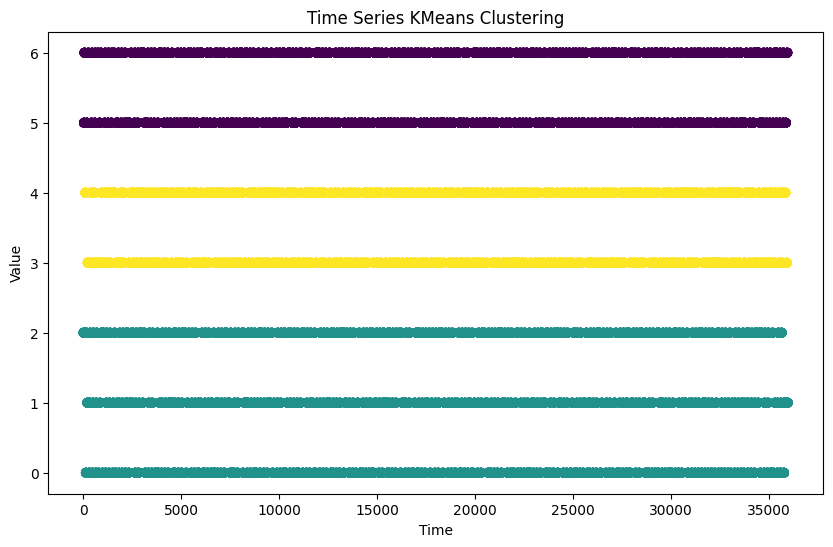

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data_array, c=clusters, cmap='viridis')
plt.title('Time Series KMeans Clustering')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

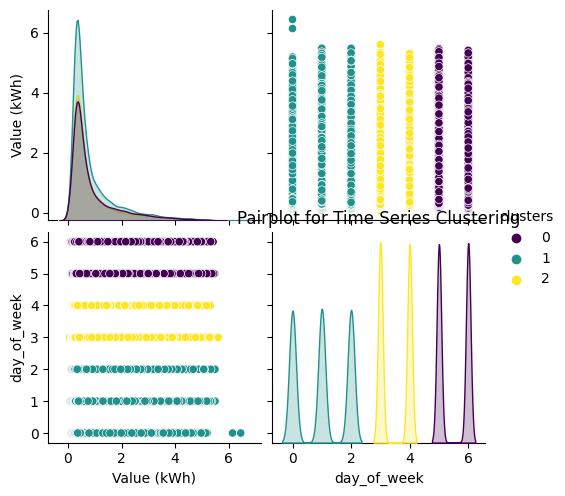

In [18]:
import seaborn as sns

# Assuming 'data' contains your time series data and 'clusters' are the cluster labels
data['clusters'] = clusters  # Add cluster labels to the dataset

sns.pairplot(data=data, hue='clusters', palette='viridis')
plt.title('Pairplot for Time Series Clustering')
plt.show()

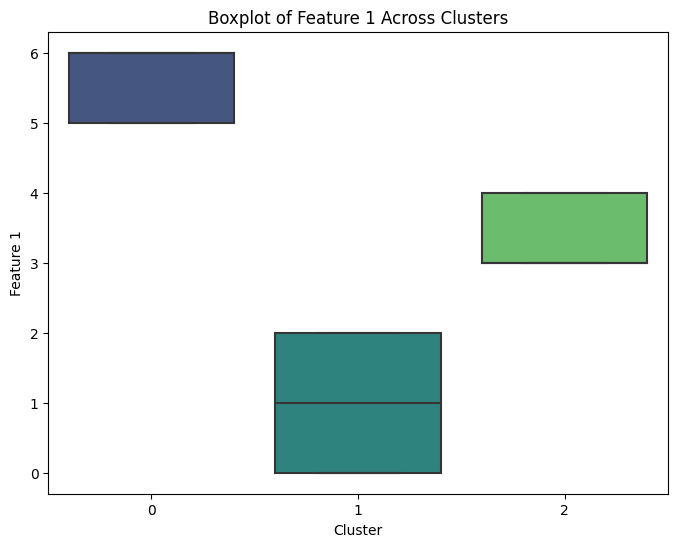

In [22]:
# Assuming 'data' has features and 'clusters' are the cluster labels
plt.figure(figsize=(8, 6))
sns.boxplot(x='clusters', y='day_of_week', data=data, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Feature 1')
plt.title('Boxplot of Feature 1 Across Clusters')
plt.show()

